In [16]:
import gzip
import simplejson
import pandas as pd
from tqdm import tqdm

In [11]:
# From http://snap.stanford.edu/data/web-Amazon-links.html
def parse(filename):
  f = gzip.open(filename, 'rt')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry


In [44]:
print(5)

5


In [46]:
reviews = []
for idx, item in enumerate(parse("data/all.txt.gz")):
    reviews.append(item)
    if idx == 10000000:
        break
    if idx % 1000000 == 0:
        print(idx)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000


In [47]:
len(reviews)

10000001

In [48]:
df = pd.DataFrame(reviews)

In [49]:
df.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000179R3I,Amazon.com: Austin Reed Dartmouth Jacket In Ba...,unknown,A3Q0VJTUO4EZ56,"Jeanmarie Kabala ""JP Kabala""",7/7,4.0,1182816000,Periwinkle Dartmouth Blazer,I own the Austin Reed dartmouth blazer in ever...
1,B000GKXY34,"Nun Chuck, Novelty Nun Toss Toy",17.99,ADX8VLDUOL7BG,M. Gingras,0/0,5.0,1262304000,Great fun!,Got these last Christmas as a gag gift. They a...
2,B000GKXY34,"Nun Chuck, Novelty Nun Toss Toy",17.99,A3NM6P6BIWTIAE,Maria Carpenter,0/1,3.0,1224633600,more like funchuck,Gave this to my dad for a gag gift after direc...
3,1882931173,Its Only Art If Its Well Hung!,unknown,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
4,B00002066I,ah,15.99,unknown,unknown,3/4,5.0,939772800,Inspiring,I hope a lot of people hear this cd. We need m...


In [50]:
df['review/score'] = df['review/score'].map(lambda x: float(x))

<AxesSubplot:ylabel='Frequency'>

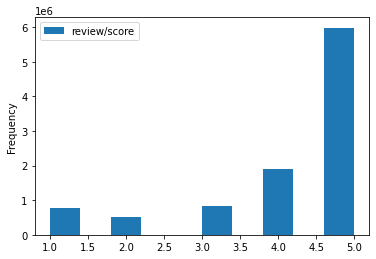

In [51]:
df[['review/score']].plot.hist()

In [52]:
df_neg = df[df['review/score']<3]
df_pos = df[df['review/score']>3]
print('Negative: %s' % df_neg.shape[0])
print('Positive: %s' % df_pos.shape[0])

Negative: 1295956
Positive: 7872295


In [54]:
df_neg.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
77,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,Book Reader,7/11,1.0,1117065600,not good,I bought this book because I read some glowing...
79,0595344550,Whispers of the Wicked Saints,10.95,AUR0VA5H0C66C,"LoveToRead ""Actually Read Books""",1/2,1.0,1119225600,Buyer beware,"This is a self-published book, and if you want..."
90,0595344550,Whispers of the Wicked Saints,10.95,A1P2KGE2Z8RTA,C. Robertson,0/0,1.0,1119916800,The Worst!,A complete waste of time. Typographical errors...
100,0595344550,Whispers of the Wicked Saints,10.95,A3OS2QHEH495TD,PW,5/5,1.0,1115856000,Oh please,I guess you have to be a romance novel lover f...
101,0595344550,Whispers of the Wicked Saints,10.95,A3S5YQQWBO0LGI,N. Ray,4/4,1.0,1119571200,Awful beyond belief!,I feel I have to write to keep others from was...


In [55]:
df_neg.to_csv('data/amazon_negative.csv')
df_pos.to_csv('data/amazon_positive.csv')